In [89]:
import numpy as np
import matplotlib.pyplot as plt


# # Define a class to hold the data
class DATA:
    m = 0.005097  # Mass per unit length of the cable
    g = 981  # Gravity acceleration
    H0 = 0  # Z-coordinate of the anchoring at X = 0 (negative for underwater applications)
    L = 2420  # Length of the cable
    XB = 2000  # X-coordinate of the fair lead (or support) at X = XB
    Iter = 200  # Maximum number of iterations for the Newton-Raphson (N-R) method
    Tol = 1e-9  # Tolerance to stop the N-R method
    InitialGuess_H = 50  # Initial guess for the horizontal force H at X = XB
    InitialGuess_V = 55  # Initial guess for the vertical force V at X = XB




In [90]:
# Define the Residue function
def Residue(DATA, X):
    mg = DATA.m * DATA.g
    # EA = DATA.EA
    H = X[0]
    V = X[1]
    RES = np.zeros(2)
    RES[0] = H / mg * (np.arcsinh(V / H) - np.arcsinh((V - mg * DATA.L) / H)) - DATA.XB
    RES[1] = H / mg * (np.sqrt(1 + ((V - mg * DATA.L) / H)**2) - np.sqrt(1 + (V / H)**2)) - DATA.H0
    return RES


In [91]:
# Define the Jacobian function
def Jacobian(DATA, X):
    mg = DATA.m * DATA.g
    # EA = DATA.EA
    H = X[0]
    V = X[1]
    JJ = np.zeros((2, 2))
    JJ[0, 0] = 1 / mg * (np.arcsinh(V / H) - np.arcsinh((-mg * DATA.L + V) / H)) + \
               H / mg * (-V / H**2 * (1 + V**2 / H**2)**(-0.5) + \
               (-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5))
    JJ[0, 1] = H / mg * (1 / H * (1 + V**2 / H**2)**(-0.5) - \
               1 / H * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5))
    JJ[1, 0] = 1 / mg * (np.sqrt(1 + (-mg * DATA.L + V)**2 / H**2) - np.sqrt(1 + V**2 / H**2)) + \
               H / mg * (-(1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5) * \
               (-mg * DATA.L + V)**2 / H**3 + (1 + V**2 / H**2)**(-0.5) * V**2 / H**3)
    JJ[1, 1] = H / mg * (-V / H**2 * (1 + V**2 / H**2)**(-0.5) + \
               (-mg * DATA.L + V) / H**2 * (1 + (-mg * DATA.L + V)**2 / H**2)**(-0.5))
    return JJ


In [92]:
# Solver
Error = 1.0
XOLD = np.array([DATA.InitialGuess_H, DATA.InitialGuess_V])
k = 1

while Error > DATA.Tol and (k < DATA.Iter):
    Res = Residue(DATA, XOLD)
    JJ = Jacobian(DATA, XOLD)
    DX = np.linalg.solve(JJ, -Res)
    Error = np.linalg.norm(DX, np.inf)
    XOLD = XOLD + DX
    k += 1

In [93]:
H, V = XOLD
L = DATA.L
mg = DATA.m * DATA.g
# EA = DATA.EA
# EA = 165*10^7
EA = 16.5e+6 * 0.5
S = np.arange(0, DATA.L + 1, 1)
X = H / mg * (np.arcsinh((V - mg * (L - S)) / H) - np.arcsinh((V - mg * L) / H)) + H * S / EA
Z = H / mg * (np.sqrt(1 + ((V - mg * (L - S)) / H)**2) - np.sqrt(1 + ((V - mg * L) / H)**2)) + S / EA * (V - mg * L + 0.5 * mg * S)
SF = (np.log(V + np.sqrt(H**2 + V**2)) * H**2 + (2 * EA * L * mg) + np.sqrt(H**2 + V**2) * V) / (2 * EA * mg)
L_s = L - S
# V_B = mg * L
delta_l = SF - L #Strech lenth minu L0

V_B = V
V_A = V - mg*L
weight_L_S = DATA.m * L_s
Tension_s = (np.sqrt(H**2 + (V_B - mg*(L_s[:]))**2) ) #At point s
max_sag = abs(min(Z))
stretching = delta_l/SF  #delta L delt på strech lenth
print(delta_l)

#Do this to give horizontal force, vertical force and tensions force unit N.
H = H/100
V = V/100
Tension_s = Tension_s/100
max_tension = max(Tension_s)

2.9865936648193383


In [94]:
# Report
print("---------------------------------------------")
print("Results Report")
print("---------------------------------------------")
# print(f"Horizontal force at the fair lead: {XOLD[0]:12.8f} [N]")
# print(f"Vertical force at the fair lead: {XOLD[1]:12.8f} [N]")
print(f"Horizontal force at the fair lead: {H:12.8f} [N]")
print(f"Vertical force at the fair lead: {V:12.8f} [N]")
print(f"Error: {Error:14.12f}")
print(f"Number of iterations: {k}")
print(f"Maximum Sag: {max_sag}")
print(f"Stretched length of the cable: {SF:12.8f}")
print(f"Stretching: {stretching}")
print(f"Maximum tensile force on the cable: {max_tension}")



---------------------------------------------
Results Report
---------------------------------------------
Horizontal force at the fair lead:  45.88518184 [N]
Vertical force at the fair lead:  60.50189970 [N]
Error: 0.000000000002
Number of iterations: 9
Maximum Sag: 601.3955668686361
Stretched length of the cable: 2422.98659366
Stretching: 0.0012326084150148149
Maximum tensile force on the cable: 75.93371965161693


In [95]:
#SAg is minimum value.

#Minimum of vector Z

<function matplotlib.pyplot.show(close=None, block=None)>

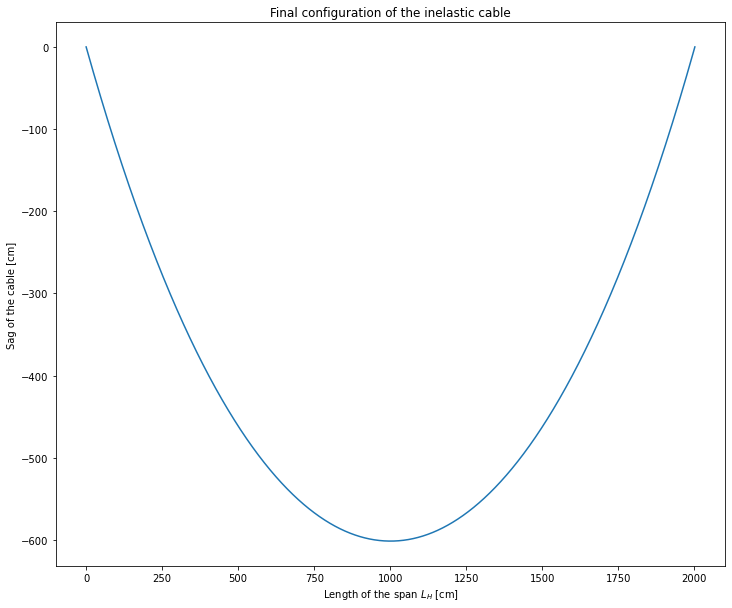

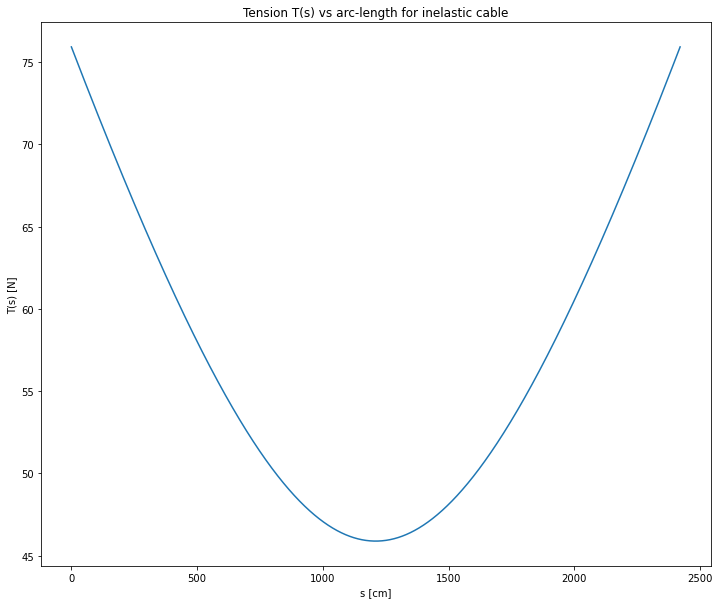

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Final configuration of the inelastic cable')
plt.xlabel('Length of the span $L_{H}$ [cm]')
plt.ylabel('Sag of the cable [cm]')
plt.plot(X, Z)
fig.savefig('./figures/Final configuration of the cable_inelastic.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize = (12, 10))
plt.title('Tension T(s) vs arc-length for inelastic cable')
plt.xlabel('s [cm]')
plt.ylabel('T(s) [N]')
plt.plot(S, Tension_s)
fig.savefig('./figures/tension T(s) vs arc-lenth_inelastic.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show